# Mapeos - Parte 2

**Referencias:**

- Robert L. Devaney, A First Course In Chaotic Dynamics: Theory and Experiment, 1992.

- Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

In [1]:
import Pkg
Pkg.activate("..")

#Cargamos Plots
using Plots

  Activating environment at `~/Desktop/Diego/Diego_Escuela/SelectosC/2021-2_TSelecFisComp-1/Project.toml`


**Ejercicio 1**

Completa la función `itera_mapeo`, cuyos argumentos son la función `f`, la condición inicial `x0` y
el *entero* `n` que indica el número de iteraciones del mapeo. La función debe devolver *tres*
*vectores*: uno que incluya la secuencia de iterados (incluyendo a la condición inicial), y otros dos
que podrás usar para el análisis gráfico. Haz una prueba sencilla para $F(x) = \sqrt{x}$.
Completa además los "docstrings".

In [2]:
"""
    itera_mapeo(f, x0, n)

Itera la función ``x->f(x)``, de una dimensión, `n` veces a partir de la
condición inicial `x0`. Regresa
"""
function itera_mapeo(f, x0, n::Int)
    #Defino/creo tres vectores de salida (de `Float64`s)
    its = [x0]
    its_x = [x0]
    its_y = [0.0]
    #Obtengo los iterados
    for i=1:n
        x1 = f(x0)
        push!(its, x1)
        push!(its_x, x0, x1)
        push!(its_y, x1, x1)
        x0 = x1
    end
    return its, its_x, its_y
end

itera_mapeo

In [3]:
#Prueba de que itera_mapeo(f, x0, n) funciona
using Test
let
    nits = 2
    xs, vx, vy = itera_mapeo(x->sqrt(x), 16.0, 2)
    @test length(xs) == nits+1
    @test length(vx) == length(vy) == 2*nits+1
    @test xs == [16.0, 4.0, 2.0]
end

Test Passed

**Ejercicio 2**

(a) Completa la función `analisis_grafico` (ver la siguiente celda), de tal manera que usándola se obtenga el
tipo de gráficas ilustradas arriba. Esto es, que se grafique el mapeo `F` y la identidad, y los `n` siguientes
iterados a partir de la condición inicial `x0`. El argumento (opcional) `domx` debe especificar el dominio que
se grafica. Utiliza la función `itera_mapeo` definida en el ejercicio anterior. Completa también los "docstrings".
Es útil tener otra función `analisis_grafico!` que sólo *actualice* la figura creada por `analisis_grafico` al
iterar otra condición inicial.

(b) Usa la función `analisis_grafico` para describir el mapeo $F(x)=\sqrt{x}$, usando tres condiciones iniciales
distintas. (Es aquí que la función `analisis_grafico!` es particularmente útil para dibujar sobrer una gráfica previa.)

(c) ¿Qué se puede concluir al iterar *muchas* veces distintas condiciones iniciales para $F(x)=\sqrt(x)$?

(d) ¿Cuántos puntos fijos tiene el mapeo $F(x) = \sqrt{x}$?

(e) A partir de la gráfica del mapeo, ¿cómo se obtienen los puntos fijos del mapeo?

In [4]:
"""
    analisis_grafico(F::Function, x0::Float64, n::Int)

Implementa el análisis gráfico para la función ``x->F(x)``, usando la condición
inicial `x0` y `n` iteraciones. Internamente se llama a `analisis_grafico!`
"""
function analisis_grafico(f, x0::Float64, n::Int, domx=0.0:1/128:1.0)
    #Graficamos x->F(x) y x->x
    Plt1 = plot(domx, x->f(x),
        xaxis=("x", (domx[1], domx[end])),
        yaxis=("f(x)"),
        color=:blue, legend=false, grid=false)

    plot!(Plt1,
        domx, identity, color=:blue, linestyle=:dash)

    #Se grafican los iterados
    analisis_grafico!(Plt1, f, x0, n, domx)
    return Plt1
end

analisis_grafico

In [5]:
"""
    analisis_grafico!(Plt1, f::Function, x0::Float64, n::Int)

Modifica la gráfica `Plt1` iterando el mapeo ``x->f(x)``, a partir
de la condición inicial `x0`, usando `n` iterados. La gráfica se
hace considerando `domx` como el dominio.s
"""
function analisis_grafico!(Plt1, f::F, x0::Float64, n::Int,
        domx=0.0:1/128:1.0; color=:orange) where {F}
    #Calculamos los iterados
    _, vx, vy = itera_mapeo(x->f(x), x0, n)

    #Graficamos los nuevos iterados
    plot!(Plt1, vx, vy, line=(color, :dash, 2.0),
        markershape=:circle, markercolor=color, markerstrokecolor=color)

    return Plt1
end

analisis_grafico!

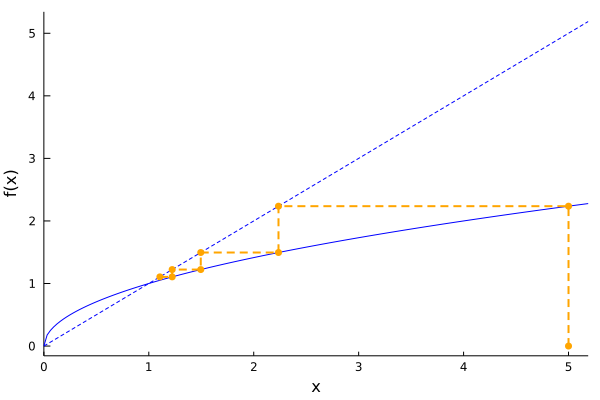

In [6]:
analisis_grafico(x->sqrt(x), 5.0, 4, 0.0:1/32:5.2)

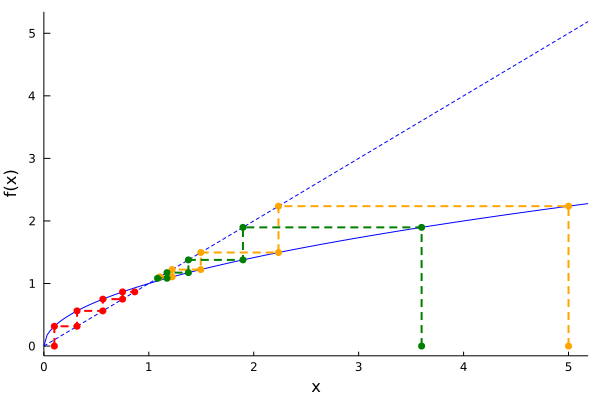

In [7]:
Plt1 = analisis_grafico(x->sqrt(x), 5.0, 4, 0.0:1/32:5.2);
analisis_grafico!(Plt1, x->sqrt(x), 0.1, 4, 0.0:1/32:5.2, color=:red)
analisis_grafico!(Plt1, x->sqrt(x), 3.6, 4, 0.0:1/32:5.2, color=:green)

## Puntos fijos

El análisis gráfico es útil pero ciertamente no riguroso. Esto se puede deber a
cuestiones de precisión numérica o simplemente a que el número de iteraciones es finito.

Un resultado riguroso (¡teorema!) que es útil para encontrar puntos fijos es el
**teorema del valor intermedio**: Supongamos que $F:[a,b]\to\mathbb{R}$ es *continua*,
y que $y_0$ se encuentra entre $F(a)$ y $F(b)$. Entonces, existe un punto en
$x_0\in[a,b]$ tal que $F(x_0)=y_0$.

Una consecuencia de este teorema es el teorema del punto fijo.

**Teorema del punto fijo:** Supongamos que $F:[a,b]\to[a,b]$ es *continua*. Entonces,
existe un punto fijo de $F(x)$ en $[a,b]$.

Algunos comentarios:

- El teorema asienta la *existencia* de un punto fijo; puede haber más.

- El teorema asume que $F$ es *continua* y que mapea el intervalo $[a,b]$ en si mismo.

- El intervalo $[a,b]$ es *cerrado*.

- El teorema **no** dice cómo encontrar a los puntos fijos.

La *demostración* se basa en aplicar el teorema del valor medio para la
función $H(x)=F(x)-x$, y mostrar que existe un valor $x_0$ tal que $H(x_0)=0$.
$H(x)$ es continua en el intervalo $[a,b]$ (así que se satisfacen las hipótesis
del teorema del punto intermedio) y satisface $H(a) = F(a)-a \ge 0$ y
$H(b)=F(b)-b\le 0$. (Estas propiedades se satisfacen ya que $F:[a,b]\to[a,b]$.)
$\Box$

## Estabilidad

A fin de entender el comportamiento *cerca* de un punto fijo, estudiaremos
ahora mapeos lineales. La idea de estudiar un mapeo lineal es que éste constituye
la primer aproximación de la series de Taylor (la linearización de algo más complejo),
no trivial en general, cerca de un punto fijo. Para hacer las cosas más sencillas,
consideraremos que el punto fijo es el cero, y el mapeo tiene la forma:

\begin{equation}
F_\alpha(x) = \alpha x.
\end{equation}

### $0<\alpha <1$.

In [ ]:
#Definición del mapeo; noten que incluimos a la pendiente como argumento de la función
f(x, α) = α * x

In [ ]:
plt2 = analisis_grafico(x->f(x, 0.6), 0.8, 20, -1:1/32:1)
analisis_grafico!(plt2, x->f(x, 0.6), -0.8, 20, -1:1/32:1, color=:green)

Como se puede observar, los iterados de ambas condiciones iniciales convergen a 0;
en algún sentido, para $0<\alpha<1$ el punto fijo los *atrae*.

In [ ]:
x1, _, _ = itera_mapeo(x->f(x, 0.6), 0.8, 20)
x2, _, _ = itera_mapeo(x->f(x, 0.6), -0.8, 20)
x1[end], x2[end]

### $\alpha>1$.

In [ ]:
x3, _, _ = itera_mapeo(x->f(x, 1.6), 0.08, 8)
x4, _, _ = itera_mapeo(x->f(x, 1.6), -0.08, 8)

plt3 = analisis_grafico(x->f(x, 1.6), 0.08, 8, -1:1/32:1)
analisis_grafico!(plt3, x->f(x, 1.6), -0.08, 8, -1:1/32:1, color=:green)

En este caso, con $\alpha > 1$, observamos que los iterados *se alejan* del
punto fijo; uno dice que el punto fijo los *repele*.

In [ ]:
x3[end], x4[end]

### Caso general

En el caso de un mapeo lineal $x_{n+1}=\alpha x_n$, el mapeo define una sucesión
geométrica. Entonces, el $n$-ésimo iterado vendrá dado por:

\begin{equation}
x_n = x_0 \alpha^n
\end{equation}

De aquí es claro que, si $0\ge\alpha<1$, el límite cuando $n\to\infty$ es 0, el punto
fijo. De igual manera, si $-1<\alpha<0$ el límite será también el punto fijo. En este
caso decimos que el punto fijo es **linealmente estable**. La diferencia entre
el caso con $\alpha$ positiva o negativa radica en la *forma* en la que los iterados
se acerrcan al punto fijo... la ambigüedad es a propósito...

Por otra parte, si $|\alpha|>1$, el límite cuando $n\to\infty$ es $\infty$, es decir,
los iterados se alejan del punto fijo. En este caso diremos que el punto
es **linealmente inestable**.

El análisis que hemos desarrollado aquí lo hicimos para mapeos lineales de la forma
$x_{n+1} = F_\alpha(x_n)=\alpha x_n$, pero es útil más allá de los mapeos lineales.
Como dijimos arriba, cualquier mapeo $F(x)$, alrededor de su punto fijo, lo podemos
escribir a primer orden como

\begin{equation}
F(x_* + \delta) = x_* + \delta F'(x_*) + \cal{O}(\delta^2),
\end{equation}

que precisamente es un mapeo lineal en $\delta$, donde el equivalente de la
pendiente $\alpha$ utilizada arria, es $F'(x_*)$. Esto es, las propiedades de
estabilidad lineal están dadas por el valor de su derivada en el punto fijo.

**Ejercicio 1**

¿Cuál es la diferencia (cualitativa, en términos de los iterados) del mapeo con
$\alpha>0$ o con $-\alpha$? Ilustren con el análisis gráfico sus conclusiones.

In [ ]:
#(Respuestas)

**Ejercicio 2**

¿Qué podemos decir de cuando $|\alpha|=1$?

In [ ]:
#(Respuestas)

## Puntos periódicos

De la misma manera que para los puntos fijos, los puntos periódicos se pueden
clasificar en atractivos, repulsivos o neutros. Básicamente, esto es consecuencia de
que cada punto periódico $\tilde{x}$, de periodo $p$, del mapeo $F(x)$, es un
*punto fijo* del mapeo $\tilde{x} = F^p(\tilde{x})$.

Un ejemplo sencillo e ilustrativo de esto es el mapeo $F(x)=x^2-1$, definido
en el intervalo $[-1,1]$. Claramente, este mapeo tiene tiene una órbita de periodo 2
dada por $0, -1, 0, -1, \dots$. Cada uno de estos puntos, son puntos fijos de

\begin{equation}
F^2(x) = (x^2-1)^2-1 = x^2 (x^2 - 2),
\end{equation}

esto es, ambos puntos (¡y sólo ellos!) satisfacen la ecuación

\begin{equation}
F^2(x) - x = x(x^3-2x-1) = x(x+1)(x^2-x-1) = 0.
\end{equation}

In [ ]:
f1 = x -> x^2-1        # First iterate
f2 = x -> f1(f1(x))  # Second iterate

In [ ]:
plot(-1:1/32:1, f1,
    xaxis=("x", (-1.1, 1.1)), yaxis=("F(x), F^2(x)", (-1.03,0.03)),
    label="F(x)", grid=:false, legend=(0.78, 0.94), background_color_legend=:transparent,
    color=:blue)

plot!(-1:1/32:1, f2, xaxis=("x", (-1.1, 1.1)), label="F^2(x)", color=:red)

plot!(-1:1/16:0.1, identity, xaxis=("x", (-1.1, 1.1)), label="Id(x)", color=:green)

Es claro de las gráficas que $(F^2)'(0)=(F^2)'(-1)=0$. Esto es, ambos puntos son
puntos fijos atractivos para el mapeo $F^2(x)$; el otro punto fijo del mapeo
$F^2(x)$, $x_* = (1-\sqrt{5})/2$, es repulsivo, ya que su pendiente es mayor a 1,
que es la pendiente de la identidad. Vale la pena notar que $x^*$ es el único punto
fijo de periodo 1, dado que satisface $F(x_*)-x_* = x_*^2-x_*-1 = 0$.

Entonces, puntos que inician suficientemente cerca de 0 o de -1 serán atraídos
respectivamente por estos puntos bajo el mapeo $F^2(x)$. Bajo el mapeo $F$, puntos
suficientemente cerca de 0 o -1, se acercarán paulativamente a la vecindad de uno y del otro.

Es claro que el concepto de estabilidad se puede extender a los puntos de periodo $n$.
Cuantitativamente, debemos evaluar la derivada de $F^n(x)$ en algún punto de la órbita periódica.

Entonces, debemos calcular la derivada del mapeo $F^n(x)$. Consideremos como ejemplo el
caso $F^2(x)$ primero. En este caso, tenemos $F^2(x)=F(F(x))$, y denotaremos a los puntos
de periodo 2 como $x_0$ y $x_1$. Entonces, usando la regla de la cadena obtenemos:

\begin{equation}
\frac{\textrm{d}F^2(x_0)}{\textrm{d}x} = F'(F(x_0)) F'(x_0) = F'(x_1) F'(x_0).
\end{equation}

De igual manera, considerando los puntos de periodo 3 tenemos, $F^3(x)=F(F^2(x))$ y obtenemos:

\begin{equation}
\frac{\textrm{d}F^3(x_0)}{\textrm{d}x} = F'(F^2(x_0)) (F^2)'(x_0) = F'(x_2) F'(x_1) F'(x_0).
\end{equation}

Esto se generaliza de manera evidente. De hecho, es fácil demostrar que se cumple

\begin{equation}
\frac{\textrm{d}F^n(x_0)}{\textrm{d}x} = (F^n)'(x_0) = F'(x_{n-1})\cdots F'(x_1)F'(x_0).
\end{equation}

De esta última relación vemos que **todos** los iterados de una órbita periódica de
periodo $n$ tienen la misma derivada *respecto* al mapeo $F^n$, i.e.,
$(F^n)'(x_0)=(F^n)'(x_1)=\dots=(F^n)'(x_{n-1})$.

Por lo tanto, todos los puntos ligados por una órbita periódica son atractivos o repulsivos.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*